In [33]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import json

from sklearn import tree
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
import functions


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
target_a = 'TARGET_BAD_FLAG'
target_b = 'IMP_TARGET_LOSS_AMT'
winners_dict = {}

In [35]:
df = functions.clean_df(file_path= '../../data_sets/SA_clean_O_fixed_HMEQ_Loss.csv', remove_cols=['z_JOB', 'z_REASON', 'Unnamed: 0'])

In [36]:
display(df.head(), df.columns)

,TARGET_BAD_FLAG,IMP_TARGET_LOSS_AMT,flag_LOAN,flag_MORTDUE,flag_VALUE,flag_YOJ,flag_DEROG,flag_DELINQ,flag_CLAGE,flag_NINQ,...,O_IMP_DELINQ,O_Flag_IMP_DELINQ,O_IMP_CLAGE,O_Flag_IMP_CLAGE,O_IMP_NINQ,O_Flag_IMP_NINQ,O_IMP_CLNO,O_Flag_IMP_CLNO,O_IMP_DEBTINC,O_Flag_IMP_DEBTINC
0,1,641.0,0,0,0,0,0,0,0,0,...,0.0,0,94.366667,0,1.0,0,9.0,0,34.818262,0
1,1,1109.0,0,0,0,0,0,0,0,0,...,2.0,0,121.833333,0,0.0,0,14.0,0,34.818262,0
2,1,767.0,0,0,0,0,0,0,0,0,...,0.0,0,149.466667,0,1.0,0,10.0,0,34.818262,0
3,1,1425.0,0,1,1,1,1,1,1,1,...,0.0,0,173.466667,0,1.0,0,20.0,0,34.818262,0
4,0,0.0,0,0,0,0,0,0,0,0,...,0.0,0,93.333333,0,0.0,0,14.0,0,34.818262,0


Index(['TARGET_BAD_FLAG', 'IMP_TARGET_LOSS_AMT', 'flag_LOAN', 'flag_MORTDUE',
       'flag_VALUE', 'flag_YOJ', 'flag_DEROG', 'flag_DELINQ', 'flag_CLAGE',
       'flag_NINQ', 'flag_CLNO', 'flag_DEBTINC', 'z_JOB_Office', 'z_JOB_Other',
       'z_JOB_ProfExe', 'z_JOB_Sales', 'z_JOB_Self', 'z_REASON_HomeImp',
       'O_IMP_LOAN', 'O_Flag_IMP_LOAN', 'O_IMP_MORTDUE', 'O_Flag_IMP_MORTDUE',
       'O_IMP_VALUE', 'O_Flag_IMP_VALUE', 'O_IMP_YOJ', 'O_Flag_IMP_YOJ',
       'O_IMP_DEROG', 'O_Flag_IMP_DEROG', 'O_IMP_DELINQ', 'O_Flag_IMP_DELINQ',
       'O_IMP_CLAGE', 'O_Flag_IMP_CLAGE', 'O_IMP_NINQ', 'O_Flag_IMP_NINQ',
       'O_IMP_CLNO', 'O_Flag_IMP_CLNO', 'O_IMP_DEBTINC', 'O_Flag_IMP_DEBTINC'],
      dtype='object')

## Splitting into train and test 

In [37]:
train_cols = list(df.columns.difference((target_a, target_b)))
x_train, x_test, y_train, y_test = functions.split_df(df = df.copy(), train_cols=train_cols, 
test_cols = [target_a, target_b], test_size=0.2, rand_seed=1)

In [38]:
display(x_train, x_test, y_train, y_test )

,O_Flag_IMP_CLAGE,O_Flag_IMP_CLNO,O_Flag_IMP_DEBTINC,O_Flag_IMP_DELINQ,O_Flag_IMP_DEROG,O_Flag_IMP_LOAN,O_Flag_IMP_MORTDUE,O_Flag_IMP_NINQ,O_Flag_IMP_VALUE,O_Flag_IMP_YOJ,...,flag_MORTDUE,flag_NINQ,flag_VALUE,flag_YOJ,z_JOB_Office,z_JOB_Other,z_JOB_ProfExe,z_JOB_Sales,z_JOB_Self,z_REASON_HomeImp
5292,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1162,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2355,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3620,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3980,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


,O_Flag_IMP_CLAGE,O_Flag_IMP_CLNO,O_Flag_IMP_DEBTINC,O_Flag_IMP_DELINQ,O_Flag_IMP_DEROG,O_Flag_IMP_LOAN,O_Flag_IMP_MORTDUE,O_Flag_IMP_NINQ,O_Flag_IMP_VALUE,O_Flag_IMP_YOJ,...,flag_MORTDUE,flag_NINQ,flag_VALUE,flag_YOJ,z_JOB_Office,z_JOB_Other,z_JOB_ProfExe,z_JOB_Sales,z_JOB_Self,z_REASON_HomeImp
4146,0,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5439,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5908,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5164,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
5208,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


,TARGET_BAD_FLAG,IMP_TARGET_LOSS_AMT
5292,1,31053.0
1162,0,0.0
2355,0,0.0
3620,0,0.0
1247,0,0.0
...,...,...
905,1,8501.0
5192,0,0.0
3980,0,0.0
235,0,0.0


,TARGET_BAD_FLAG,IMP_TARGET_LOSS_AMT
4146,1,23515.0
4103,0,0.0
5439,0,0.0
997,0,0.0
5908,0,0.0
...,...,...
4171,0,0.0
100,1,4003.0
5164,0,0.0
5208,0,0.0


In [39]:
#Filtering the train and test splits only on values with amount > 0 
#in clean up steps, missing amounts were filled with 0s...
#there were no zeros in the column prior to that
reg_y_train = y_train[y_train[target_a]==1]
reg_y_test = y_test[y_test[target_a]==1]
#subsetting based on index
reg_x_train =x_train[x_train.index.isin(reg_y_train.index)]  
reg_x_test = x_test[x_test.index.isin(reg_y_test.index)] 


In [40]:
x_train.shape[1]

36

## Feature Selection

### Stepwise Feature Selection

In [41]:
sfs = SFS (LinearRegression(),
k_features=(1,x_train.shape[1]),
forward=True,
floating=False,
scoring='r2',
cv=5)

In [42]:
sfs.fit(reg_x_train.values, reg_y_train[target_b].values, custom_feature_names=reg_x_train.columns)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 36),
                          scoring='r2')

In [43]:
sfs_dict = sfs.get_metric_dict()
sfs_df = pd.DataFrame.from_dict(sfs_dict).T[['feature_names', 'avg_score']].sort_values(by= 'avg_score', ascending = False)
sfs_best_model = sfs_df.iloc[0]['feature_names']

In [78]:
sfs_df

,feature_names,avg_score
18,"(O_Flag_IMP_DELINQ, O_Flag_IMP_DEROG, O_Flag_I...",0.861232
17,"(O_Flag_IMP_DELINQ, O_Flag_IMP_DEROG, O_Flag_I...",0.861232
19,"(O_Flag_IMP_DELINQ, O_Flag_IMP_DEROG, O_Flag_I...",0.861178
16,"(O_Flag_IMP_DELINQ, O_Flag_IMP_DEROG, O_Flag_I...",0.861177
20,"(O_Flag_IMP_CLAGE, O_Flag_IMP_DELINQ, O_Flag_I...",0.861081
21,"(O_Flag_IMP_CLAGE, O_Flag_IMP_DELINQ, O_Flag_I...",0.860957
22,"(O_Flag_IMP_CLAGE, O_Flag_IMP_DELINQ, O_Flag_I...",0.86081
15,"(O_Flag_IMP_DEROG, O_Flag_IMP_YOJ, O_IMP_CLAGE...",0.860743
23,"(O_Flag_IMP_CLAGE, O_Flag_IMP_DELINQ, O_Flag_I...",0.860642
24,"(O_Flag_IMP_CLAGE, O_Flag_IMP_DELINQ, O_Flag_I...",0.860429


In [62]:
winners_dict['sfs_best_model']= sfs_best_model
list(sfs_best_model)

['O_Flag_IMP_DELINQ',
 'O_Flag_IMP_DEROG',
 'O_Flag_IMP_YOJ',
 'O_IMP_CLAGE',
 'O_IMP_CLNO',
 'O_IMP_DEBTINC',
 'O_IMP_DELINQ',
 'O_IMP_LOAN',
 'O_IMP_YOJ',
 'flag_CLAGE',
 'flag_CLNO',
 'flag_DEBTINC',
 'flag_DELINQ',
 'flag_LOAN',
 'z_JOB_Other',
 'z_JOB_Sales',
 'z_JOB_Self',
 'z_REASON_HomeImp']

In [63]:
LR= LinearRegression()
LR = LR.fit(reg_x_train[list(sfs_best_model)], reg_y_train[target_b])

In [64]:
pred1 = LR.predict(reg_x_train[list(sfs_best_model)])

In [68]:
RMSE1 = ( metrics.mean_squared_error( reg_y_train[target_b], pred1))**0.5
RMSE1

3766.094971681073

In [69]:
LR2 = LR.fit(reg_x_train, reg_y_train[target_b])
pred2 = LR.predict(reg_x_train)
RMSE2 = ( metrics.mean_squared_error(reg_y_train[target_b], pred2))**0.5
RMSE2

3574.3025446566903

In [71]:
metrics.r2_score(reg_y_train[target_b], pred2)

0.8875064000546004

In [72]:
metrics.r2_score(reg_y_train[target_b], pred1)

0.8751099815711629

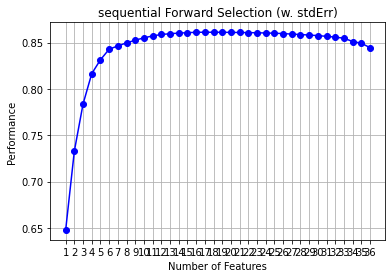

In [45]:
sfs_plot = plot_sfs(sfs_dict, kind = None)
plt.title('sequential Forward Selection (w. stdErr)')
plt.grid()

### Decision Trees

In [46]:
#feature Selection Using Decision Tree

sfs_DT = SFS (tree.DecisionTreeRegressor(),
k_features=(1,x_train.shape[1]),
forward=True,
floating=False,
scoring='r2',
cv=5)


sfs_DT.fit(reg_x_train.values, reg_y_train[target_b].values, custom_feature_names=x_train.columns)

SequentialFeatureSelector(estimator=DecisionTreeRegressor(), k_features=(1, 36),
                          scoring='r2')

In [47]:
sfs_DT_dict = sfs_DT.get_metric_dict()
sfs_DT_df = pd.DataFrame.from_dict(sfs_DT_dict).T[['feature_names', 'avg_score']].sort_values(by= 'avg_score', ascending = False)
sfs_DT_best_model = sfs_DT_df.iloc[0]['feature_names']

In [48]:
winners_dict ['sfs_DT_best_model'] =sfs_DT_best_model 
sfs_DT_best_model

('O_Flag_IMP_CLAGE',
 'O_Flag_IMP_DEROG',
 'O_Flag_IMP_LOAN',
 'O_Flag_IMP_NINQ',
 'O_Flag_IMP_YOJ',
 'O_IMP_CLNO',
 'O_IMP_DEBTINC',
 'O_IMP_DELINQ',
 'O_IMP_DEROG',
 'O_IMP_LOAN',
 'flag_CLAGE',
 'flag_DEBTINC',
 'flag_DELINQ',
 'flag_VALUE',
 'z_JOB_ProfExe',
 'z_JOB_Self',
 'z_REASON_HomeImp')

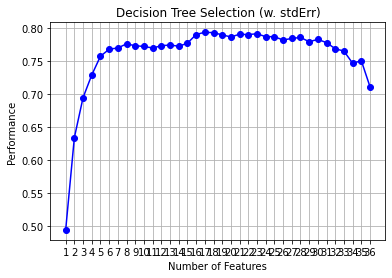

In [49]:
sfs_DT_plot = plot_sfs(sfs_DT_dict, kind = None)
plt.title('Decision Tree Selection (w. stdErr)')
plt.grid()

### Random Forest

In [50]:
sfs_RF = SFS (RandomForestRegressor(),
k_features=(1,x_train.shape[1]),
forward=True,
floating=False,
scoring='r2',
cv=5, 
n_jobs = 5)


sfs_RF.fit(reg_x_train.values, reg_y_train[target_b].values, custom_feature_names=x_train.columns)

SequentialFeatureSelector(estimator=RandomForestRegressor(), k_features=(1, 36),
                          n_jobs=5, scoring='r2')

In [51]:
sfs_RF_dict = sfs_RF.get_metric_dict()
sfs_RF_df = pd.DataFrame.from_dict(sfs_RF_dict).T[['feature_names', 'avg_score']].sort_values(by= 'avg_score', ascending = False)
sfs_RF_best_model = sfs_RF_df.iloc[0]['feature_names']

In [52]:
winners_dict['sfs_RF_best_model'] = sfs_RF_best_model

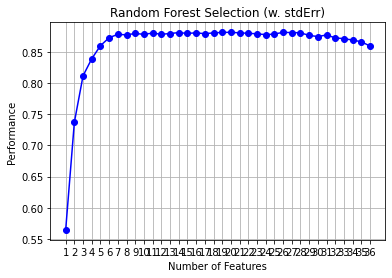

In [53]:
sfs_RF_plot = plot_sfs(sfs_RF_dict, kind = None)
plt.title('Random Forest Selection (w. stdErr)')
plt.grid()

### Gradient Boosting

In [54]:
sfs_GB = SFS (GradientBoostingRegressor(),
k_features=(1,x_train.shape[1]),
forward=True,
floating=False,
scoring='r2',
cv=5, 
n_jobs = 5)


sfs_GB.fit(reg_x_train.values, reg_y_train[target_b].values, custom_feature_names=x_train.columns)

SequentialFeatureSelector(estimator=GradientBoostingRegressor(),
                          k_features=(1, 36), n_jobs=5, scoring='r2')

In [55]:
sfs_GB_dict = sfs_GB.get_metric_dict()
sfs_GB_df = pd.DataFrame.from_dict(sfs_GB_dict).T[['feature_names', 'avg_score']].sort_values(by= 'avg_score', ascending = False)
sfs_GB_best_model = sfs_GB_df.iloc[0]['feature_names']

In [56]:
winners_dict['sfs_GB_best_model'] = sfs_GB_best_model

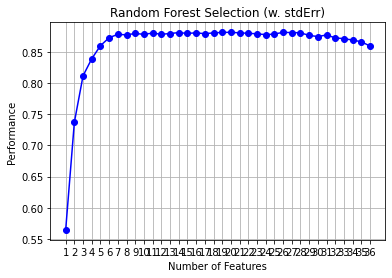

In [57]:
sfs_RF_plot = plot_sfs(sfs_RF_dict, kind = None)
plt.title('Random Forest Selection (w. stdErr)')
plt.grid()

In [58]:
#saving selected features

with open('winners.json', 'w') as fp:
    json.dump(winners_dict, fp,  indent=4)

In [60]:
for each in winners_dict:
    print(each, len(winners_dict[each]))

sfs_best_model 18
sfs_DT_best_model 17
sfs_RF_best_model 20
sfs_GB_best_model 16


### Feature Selection for Classification Models